In [41]:
import kagglehub
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,classification_report

In [42]:
# 1. Prétraitement des Données 
path = kagglehub.dataset_download("hosammhmdali/diabetes-dataset")

print("Path to dataset files:", path)

Path to dataset files: /home/zakaria-elguazzar/.cache/kagglehub/datasets/hosammhmdali/diabetes-dataset/versions/1


In [43]:
# a) Charger le jeu de données choisi (choisir une base de données) 
data=pd.read_csv(path+"/diabetes.csv")

In [44]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


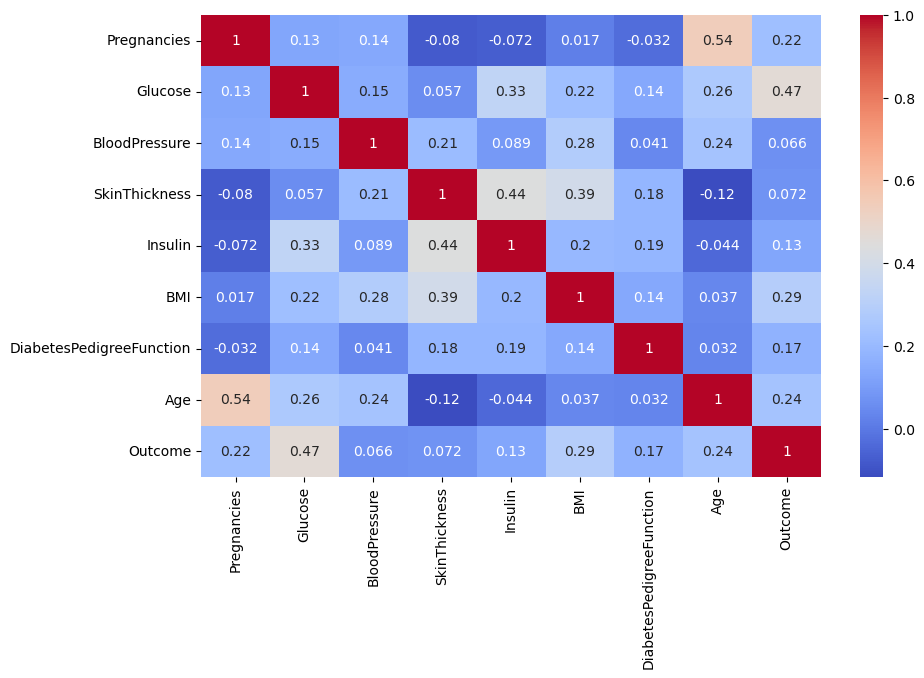

In [45]:
# Visualiser les corrélations
plt.figure(figsize=(10, 6))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm")
plt.show()

In [46]:
correlation_matrix = data.corr()
target_corr = correlation_matrix["Outcome"].abs()  # Prendre les valeurs absolues

# Trier les variables par corrélation décroissante
best2_variables = target_corr.sort_values(ascending=False)[1:3].index.tolist()
print(best2_variables)

['Glucose', 'BMI']


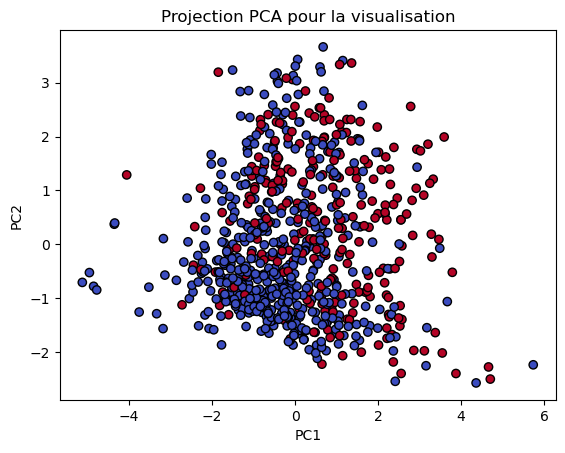

In [47]:
X = data.drop("Outcome", axis=1).values
y = data["Outcome"].values
# Standardisation des données
scaler = StandardScaler()
X_scaled_pca = scaler.fit_transform(X)
# Application du PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled_pca)
# Affichage des données projetées
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap="coolwarm", edgecolors='k')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Projection PCA pour la visualisation")
plt.show()


In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0 )

In [49]:
scaler = StandardScaler()
X_scaled = scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)


In [50]:
# Créer et entraîner le modèle SVM avec un noyau RBF
svm_rbf = SVC(kernel='rbf')  
svm_rbf.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_rbf = svm_rbf.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred_rbf)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé
print(classification_report(y_test, y_pred_rbf))

Accuracy: 0.7835
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       154
           1       0.75      0.53      0.62        77

    accuracy                           0.78       231
   macro avg       0.77      0.72      0.73       231
weighted avg       0.78      0.78      0.77       231



In [51]:
# Créer et entraîner le modèle SVM avec un noyau linéaire
svm_linear = SVC(kernel='linear')  
svm_linear.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_linear = svm_linear.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred_linear)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé
print(classification_report(y_test, y_pred_linear))

Accuracy: 0.7879
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       154
           1       0.73      0.57      0.64        77

    accuracy                           0.79       231
   macro avg       0.77      0.73      0.75       231
weighted avg       0.78      0.79      0.78       231



In [52]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear','rbf'],  # Kernel types
    'gamma': ['scale', 'auto', 0.01, 0.1, 1]  # Gamma values (for 'rbf' kernel)
}

# Create the SVC model
svc = SVC()

# Create the GridSearchCV instance
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', n_jobs=4, verbose=1)

# Fit GridSearchCV on training data
grid_search.fit(X_train, y_train)

# Display the best parameters and best accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Convert results to DataFrame for easier analysis
results = pd.DataFrame(grid_search.cv_results_)

# Sort results by best accuracy
sorted_results = results[['param_C', 'param_kernel', 'param_gamma', 'mean_test_score']].sort_values(by='mean_test_score', ascending=False)

# Print sorted results
print(sorted_results)

Fitting 5 folds for each of 40 candidates, totalling 200 fits
Best Parameters: {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
Best Accuracy: 0.7713049498096228
    param_C param_kernel param_gamma  mean_test_score
15      1.0          rbf        0.01         0.771305
25     10.0          rbf        0.01         0.762080
0       0.1       linear       scale         0.756490
2       0.1       linear        auto         0.756490
8       0.1       linear           1         0.756490
20     10.0       linear       scale         0.756490
6       0.1       linear         0.1         0.756490
4       0.1       linear        0.01         0.756490
32    100.0       linear        auto         0.756490
34    100.0       linear        0.01         0.756490
38    100.0       linear           1         0.756490
30    100.0       linear       scale         0.756490
28     10.0       linear           1         0.756490
26     10.0       linear         0.1         0.756490
24     10.0       linear        0.01

In [53]:
best=grid_search.best_params_

In [54]:
# Créer et entraîner le modèle SVM de GridSerach
svm_opt = SVC(kernel=best["kernel"],gamma=best["gamma"], C=best["C"])  
svm_opt.fit(X_train, y_train)

# Prédictions sur l'ensemble de test
y_pred_opt = svm_opt.predict(X_test)

# Évaluer la performance du modèle
accuracy = accuracy_score(y_test, y_pred_opt)
print(f"Accuracy: {accuracy:.4f}")

# Afficher un rapport détaillé
print(classification_report(y_test, y_pred_opt))

Accuracy: 0.7965
              precision    recall  f1-score   support

           0       0.81      0.91      0.86       154
           1       0.76      0.57      0.65        77

    accuracy                           0.80       231
   macro avg       0.78      0.74      0.75       231
weighted avg       0.79      0.80      0.79       231



In [55]:
# Affichage du nombre total de vecteurs supports
total_support_vectors = svm_rbf.support_vectors_.shape[0]
print(f"Nombre total de vecteurs supports : {total_support_vectors}")

# Affichage de la répartition des vecteurs supports par classe
support_vectors_per_class = svm_rbf.n_support_
for i, count in enumerate(support_vectors_per_class):
    print(f"Classe {i}: {count} vecteurs supports")


Nombre total de vecteurs supports : 317
Classe 0: 161 vecteurs supports
Classe 1: 156 vecteurs supports


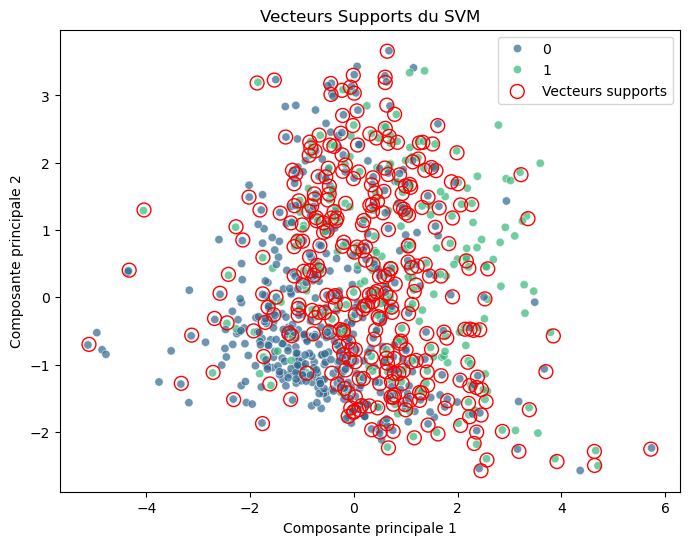

In [56]:
X_train_pca = pca.transform(X_train)  # Appliquer la même transformation PCA

plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, palette="viridis", alpha=0.7)

# Indices des vecteurs supports dans X_train
support_vectors_pca = X_train_pca[svm_rbf.support_]

plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], facecolors='none', edgecolors='r', s=100, label="Vecteurs supports")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Vecteurs Supports du SVM")
plt.legend()
plt.show()

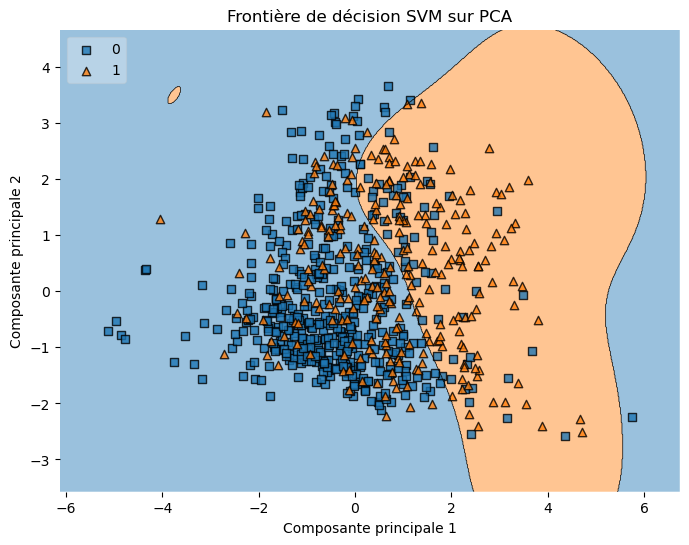

In [57]:
svm_rbf.fit(X_pca, y)
plt.figure(figsize=(8, 6))
plot_decision_regions(X_pca, y, clf=svm_rbf, legend=2)
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.title("Frontière de décision SVM sur PCA")
plt.show()

In [58]:
# 5. Calculer les métriques d'évaluation
def evaluate_model(y_true, y_pred, model_name):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    print(f"📊 Évaluation du modèle {model_name}:")
    print(f"🔹 Accuracy  = {accuracy:.4f}")
    print(f"🔹 Précision = {precision:.4f}")
    print(f"🔹 Rappel    = {recall:.4f}")
    print(f"🔹 F1-score  = {f1:.4f}\n")

# 6. Afficher les résultats
evaluate_model(y_test, y_pred_linear, "SVM Linéaire")
evaluate_model(y_test, y_pred_rbf, "SVM RBF")
evaluate_model(y_test, y_pred_opt, "SVM_optimal")


📊 Évaluation du modèle SVM Linéaire:
🔹 Accuracy  = 0.7879
🔹 Précision = 0.7333
🔹 Rappel    = 0.5714
🔹 F1-score  = 0.6423

📊 Évaluation du modèle SVM RBF:
🔹 Accuracy  = 0.7835
🔹 Précision = 0.7455
🔹 Rappel    = 0.5325
🔹 F1-score  = 0.6212

📊 Évaluation du modèle SVM_optimal:
🔹 Accuracy  = 0.7965
🔹 Précision = 0.7586
🔹 Rappel    = 0.5714
🔹 F1-score  = 0.6519

